In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import re

# Get all files matching the pattern 'odometry_data_*.csv'
file_list = glob.glob('flight_log_*.csv')

# Extract numbers from file names and find the max
file_numbers = [int(re.search(r'odometry_data_(\d+)\.csv', f).group(1)) for f in file_list]
max_number = max(file_numbers)

# Construct the file path with the max number
file_path = f'odometry_data_{max_number}.csv'
print(file_path)

# Load the CSV data
data = pd.read_csv(filepath_or_buffer=file_path, header=None)
# data = pd.read_csv('odometry_data_38.csv', header=None)
data.columns = ['timestamp','u1','u2','u3','f1','f2','f3','fsum','alt_error','q_r','q_i','q_j','q_k',
                'p_s','q_s','r_s','n_x','n_y','n_z','nx_aor','ny_aor','nz_aor','roll_rad','pitch_rad','yaw_rad','x','y','z']
# data.columns = ['timestamp','u1','u2','u3','f1','f2','f3','f1_slope','f2_slope','f3_slope','fsum','alt_error','q_r','q_i','q_j','q_k',
#                 'p_s','q_s','r_s','n_x','n_y','n_z','nx_aor','ny_aor','nz_aor','roll_rad','pitch_rad','yaw_rad','x','y','z']

data = data.iloc[2:]
data['timestamp'] = (data['timestamp'] - data['timestamp'][2])*1e-6


odometry_data_2.csv


In [43]:
data.head()

,timestamp,u1,u2,u3,f1,f2,f3,fsum,alt_error,q_r,...,n_z,nx_aor,ny_aor,nz_aor,roll_rad,pitch_rad,yaw_rad,x,y,z
2,0.000,2.29623,-3.99247,6.17536,9.77118,1.84734,13.6503,20.7897,-1,0.926196,...,0.970594,0,0,1,0.240905,0.032988,0.739814,0.322906,-0.135303,-10.5607
3,0.008,2.39223,-3.90217,5.81251,9.86719,1.93764,13.2875,20.7897,-1,0.933903,...,0.969185,0,0,1,0.246608,0.034010,0.693588,0.320015,-0.134672,-10.5656
4,0.016,2.46905,-3.81908,5.47889,9.94400,2.02073,12.9538,20.7897,-1,0.941524,...,0.968410,0,0,1,0.249875,0.033170,0.645353,0.316931,-0.133839,-10.5710
5,0.024,2.52898,-3.73755,5.17063,10.00390,2.10226,12.6456,20.7897,-1,0.948966,...,0.968186,0,0,1,0.251094,0.030664,0.595223,0.313663,-0.132795,-10.5769
6,0.032,2.57657,-3.66040,4.88071,10.05150,2.17940,12.3557,20.7897,-1,0.956141,...,0.968423,0,0,1,0.250590,0.026609,0.543284,0.310228,-0.131531,-10.5832


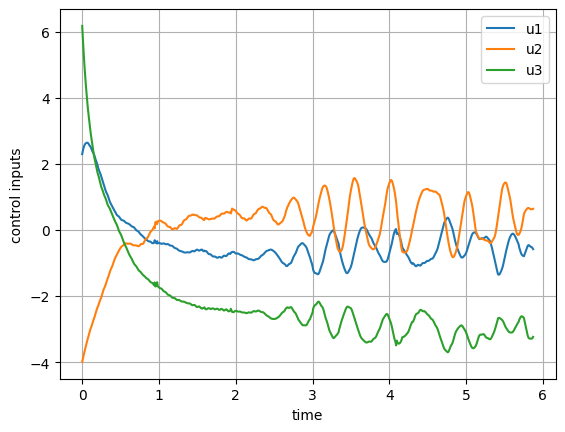

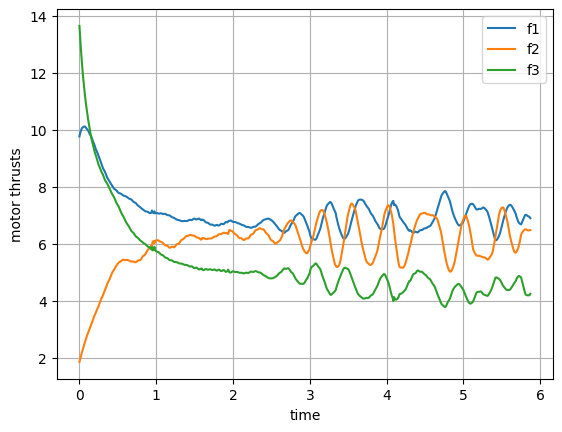

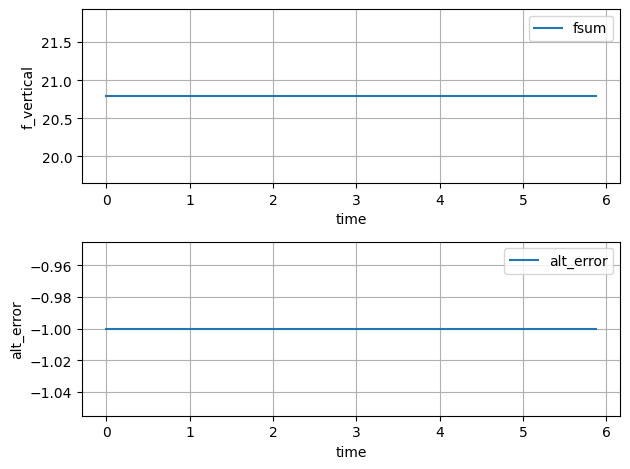

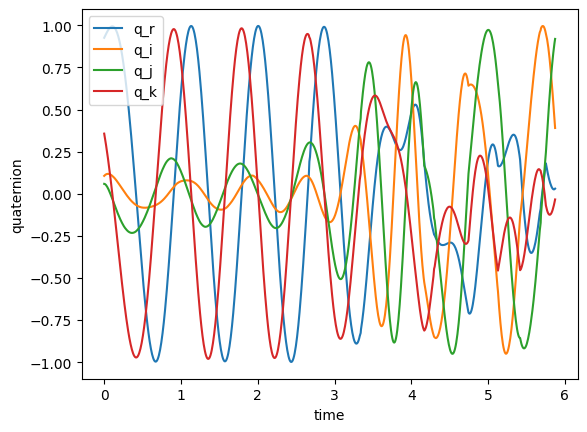

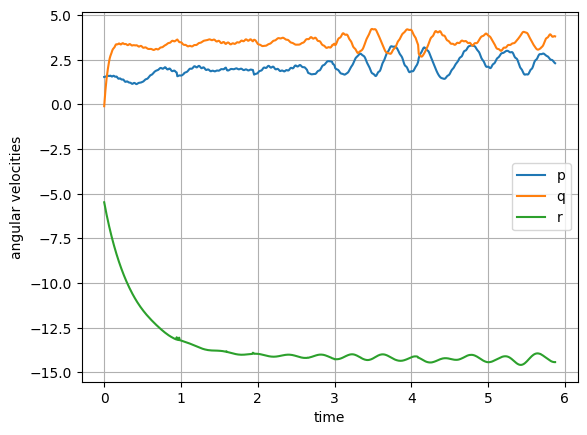

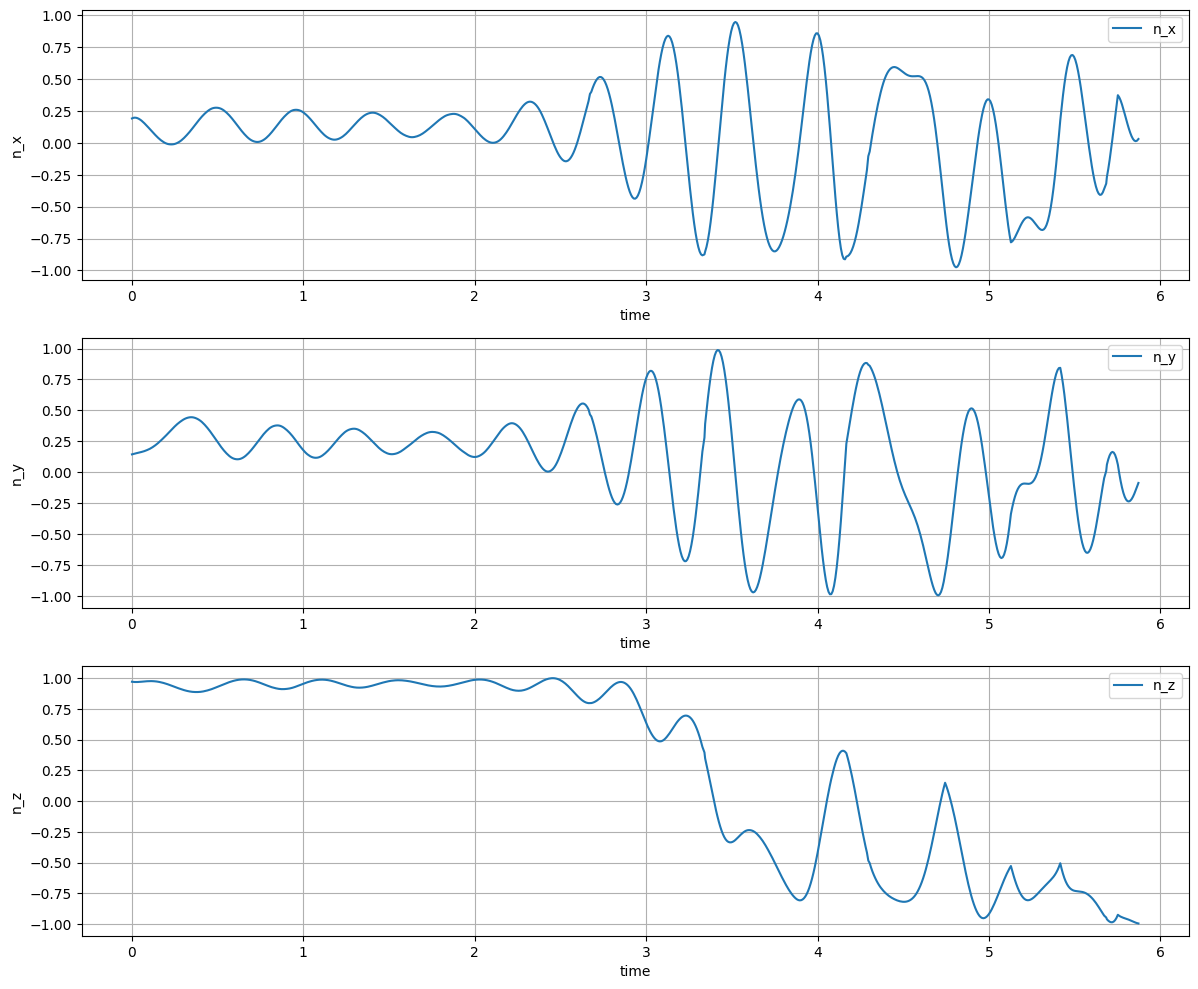

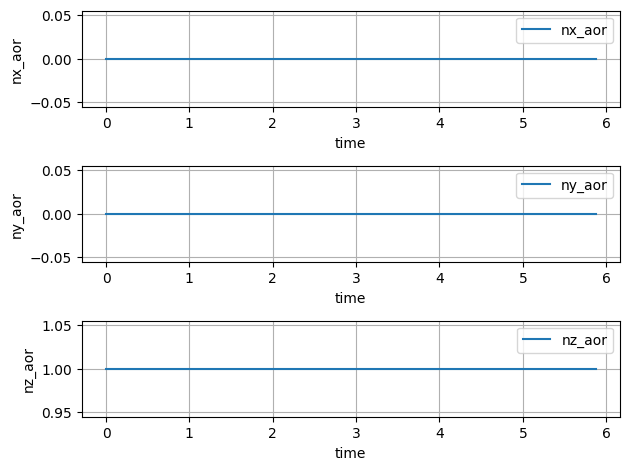

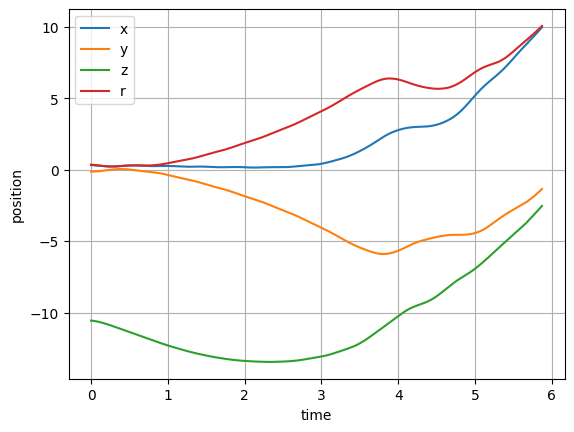

In [44]:
# plot the data
plt.figure()
plt.plot(data['timestamp'], data['u1'], label='u1')
plt.plot(data['timestamp'], data['u2'], label='u2')
plt.plot(data['timestamp'], data['u3'], label='u3')

plt.xlabel('time')
plt.ylabel('control inputs')
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(data['timestamp'], data['f1'], label='f1')
plt.plot(data['timestamp'], data['f2'], label='f2')
plt.plot(data['timestamp'], data['f3'], label='f3')

plt.xlabel('time')
plt.ylabel('motor thrusts')
plt.legend()
plt.grid()
plt.show()

# plt.figure()
# plt.plot(data['timestamp'], data['f1_slope'], label='f1_slope')
# plt.plot(data['timestamp'], data['f2_slope'], label='f2_slope')
# plt.plot(data['timestamp'], data['f3_slope'], label='f3_slope')

# plt.xlabel('time')
# plt.ylabel('motor thrust slopes')
# plt.legend()
# plt.grid()
# plt.show()

plt.figure()
plt.subplot(2,1,1)
plt.plot(data['timestamp'], data['fsum'], label='fsum')
plt.xlabel('time')
plt.ylabel('f_vertical')
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.plot(data['timestamp'], data['alt_error'], label='alt_error')
plt.xlabel('time')
plt.ylabel('alt_error')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

plt.figure()
plt.plot(data['timestamp'], data['q_r'], label='q_r')
plt.plot(data['timestamp'], data['q_i'], label='q_i')
plt.plot(data['timestamp'], data['q_j'], label='q_j')
plt.plot(data['timestamp'], data['q_k'], label='q_k')

plt.xlabel('time')
plt.ylabel('quaternion')
plt.legend()

plt.figure()
plt.plot(data['timestamp'], data['p_s'], label='p')
plt.plot(data['timestamp'], data['q_s'], label='q')
plt.plot(data['timestamp'], data['r_s'], label='r')

plt.xlabel('time')
plt.ylabel('angular velocities')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12,10))

plt.subplot(3,1,1)
plt.plot(data['timestamp'], data['n_x'], label='n_x')
plt.xlabel('time')
plt.ylabel('n_x')
plt.legend()
plt.grid()

plt.subplot(3,1,2)
plt.plot(data['timestamp'], data['n_y'], label='n_y')
plt.xlabel('time')
plt.ylabel('n_y')
plt.legend()
plt.grid()

plt.subplot(3,1,3)
plt.plot(data['timestamp'], data['n_z'], label='n_z')
plt.xlabel('time')
plt.ylabel('n_z')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

plt.subplot(3,1,1)
plt.plot(data['timestamp'], data['nx_aor'], label='nx_aor')
plt.xlabel('time')
plt.ylabel('nx_aor')
plt.legend()
plt.grid()

plt.subplot(3,1,2)
plt.plot(data['timestamp'], data['ny_aor'], label='ny_aor')
plt.xlabel('time')
plt.ylabel('ny_aor')
plt.legend()
plt.grid()

plt.subplot(3,1,3)
plt.plot(data['timestamp'], data['nz_aor'], label='nz_aor')
plt.xlabel('time')
plt.ylabel('nz_aor')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

plt.figure()
plt.plot(data['timestamp'], data['x'], label='x')
plt.plot(data['timestamp'], data['y'], label='y')
plt.plot(data['timestamp'], data['z'], label='z')
plt.plot(data['timestamp'], (data['x']**2 + data['y']**2)**0.5, label='r')

plt.xlabel('time')
plt.ylabel('position')
plt.legend()
plt.grid()
plt.show()